Примечание. Как и в предыдущем модуле, вы можете посмотреть подробный разбор структуры предлагаемых запросов во вкладке Детализация.

In [ ]:
SELECT
    type1
FROM sql.pokemon

Чтобы получить уникальные значения из столбца, воспользуемся ключевым словом DISTINCT.

In [ ]:
SELECT DISTINCT
    type1
FROM sql.pokemon

Получим, например, все уникальные пары основного и дополнительного типов для покемонов.

In [ ]:
SELECT DISTINCT
    type1,
    type2
FROM sql.pokemon

Давайте посчитаем количество строк в таблице. Для этого применим агрегатную функцию COUNT.

In [ ]:
SELECT
    COUNT(*)
FROM sql.pokemon

Внутри функции COUNT мы можем также применять DISTINCT, чтобы вычислить количество уникальных значений.

In [ ]:
SELECT
    COUNT(DISTINCT type1)
FROM sql.pokemon

Назовём основные агрегатные функции, с которыми нам предстоит работать:
```
- COUNT — вычисляет число непустых строк;
- SUM — вычисляет сумму;
- AVG — вычисляет среднее;
- MAX — вычисляет максимум;
- MIN — вычисляет минимум.
```

Какое среднее количество очков здоровья у покемонов-драконов (то есть тех, у кого основной тип — Dragon)?

In [ ]:
SELECT AVG(hp)
FROM sql.pokemon
WHERE type1 = 'Dragon'

Кроме того, мы можем применять несколько агрегатных функций в одном запросе.

In [ ]:
SELECT
    COUNT(*) AS "всего травяных покемонов",
    COUNT(type2) AS "покемонов с дополнительным типом",
    AVG(attack) AS "средняя атака",
    AVG(defense) AS "средняя защита"
FROM sql.pokemon
WHERE type1 = 'Grass'

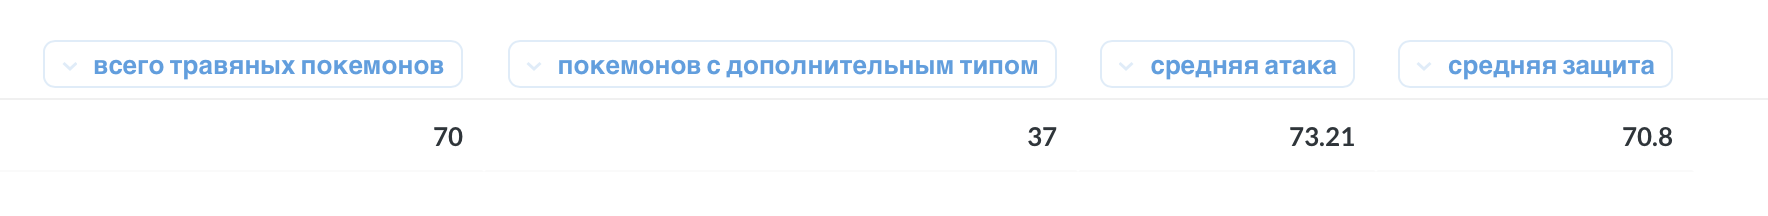

Напишите запрос, который выведет:

- количество покемонов (столбец pokemon_count),
- среднюю скорость (столбец avg_speed),
- максимальное и минимальное число очков здоровья (столбцы max_hp и min_hp)

для электрических (Electric) покемонов, имеющих дополнительный тип и показатели атаки или защиты больше 50.

In [ ]:
SELECT
    COUNT(*) AS pokemon_count,
    AVG(speed) AS avg_speed,
    MAX(hp) AS max_hp,
    MIN(hp) AS min_hp
FROM sql.pokemon
WHERE type1 = 'Electric'
    AND type2 IS NOT NULL
    AND (attack > 50 OR defense > 50)

GROUP BY используется для определения групп выходных строк, к которым могут применяться агрегатные функции.

In [ ]:
SELECT
    type1 AS pokemon_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
GROUP BY type1
ORDER BY type1

Представим ТОП существующих типов покемонов.

In [ ]:
SELECT
    type1 AS pokemon_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
GROUP BY pokemon_type
ORDER BY COUNT(*) DESC

Мы можем осуществлять группировку по нескольким столбцам.

In [ ]:
SELECT
    type1 AS primary_type,
    type2 AS additional_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
GROUP BY 1, 2
ORDER BY 1, 2 NULLS FIRST

Если ключевое слово WHERE определяет фильтрацию строк до агрегирования, то для фильтрации уже агрегированных данных применяется ключевое слово HAVING.

In [ ]:
SELECT
    type1 AS primary_type,
    AVG(attack) AS avg_attack
FROM sql.pokemon
GROUP BY primary_type 
HAVING AVG(attack) > 90

В общем виде синтаксис оператора SELECT, с учётом имеющихся на данный момент знаний, представляем следующим образом:

Обратите внимание! В квадратных скобках указаны необязательные предложения: они могут отсутствовать в операторе SELECT.

In [ ]:
SELECT [ALL | DISTINCT] список_столбцов|*
FROM список_имён_таблиц
[WHERE условие_поиска]
[GROUP BY список_имён_столбцов]
[HAVING условие_поиска]
[ORDER BY имя_столбца [ASC | DESC],…]

Напишите запрос, который выведет основной и дополнительный типы покемонов (столбцы primary_type и additional_type) для тех, у кого средний показатель атаки больше 100 и максимальный показатель очков здоровья меньше 80.

In [ ]:
SELECT 
    type1 AS primary_type, 
    type2 AS additional_type
FROM sql.pokemon
GROUP BY type1, type2
HAVING AVG(attack) > 100 AND MAX(hp) < 80

Напишите запрос, чтобы для покемонов, чьё имя (name) начинается с S, вывести столбцы с их основным типом (primary_type) и общим числом покемонов этого типа (pokemon_count). Оставьте только те типы, у которых средний показатель защиты больше 80. Выведите топ-3 типов по числу покемонов в них.

In [ ]:
SELECT 
    type1 AS primary_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
WHERE name LIKE 'S%' 
GROUP BY type1
HAVING AVG(defense) > 80
ORDER BY pokemon_count DESC
LIMIT 3;

Сколько различных значений показателей атаки есть у покемонов с типом Water (основным или дополнительным)?

In [ ]:
SELECT COUNT(DISTINCT attack) AS unique_attack_values
FROM sql.pokemon
WHERE 
    type1 = 'Water'
    OR type2 = 'Water'

Напишите запрос, который выведет основной и дополнительный типы покемонов и средние значения по каждому показателю (столбцы avg_hp, avg_attack, avg_defense, avg_speed).Оставьте только те пары типов, у которых сумма этих четырёх показателей более 400.

In [ ]:
SELECT 
    type1 AS primary_type,
    type2 AS additional_type,
    AVG(hp) AS avg_hp,
    AVG(attack) AS avg_attack,
    AVG(defense) AS avg_defense,
    AVG(speed) AS avg_speed
FROM sql.pokemon
GROUP BY type1, type2
HAVING (AVG(hp) + AVG(attack) + AVG(defense) + AVG(speed)) > 400

Напишите запрос, который выведет столбцы с основным типом покемона и общим количеством покемонов этого типа. Учитывайте только тех покемонов, у кого или показатель атаки, или показатель защиты принимает значение между 50 и 100 включительно. Оставьте только те типы покемонов, у которых максимальный показатель здоровья не больше 125. Выведите только тот тип, который находится на пятом месте по количеству покемонов.

In [ ]:
SELECT 
    type1 AS primary_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
WHERE (attack BETWEEN 50 AND 100 OR defense BETWEEN 50 AND 100)
GROUP BY type1
HAVING MAX(hp) <= 125
ORDER BY pokemon_count DESC
LIMIT 1 OFFSET 4;